In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline

In [16]:
lung_df= pd.read_csv('C:/Users/KIIT/Programs/Projects/Content/lung_cancer.csv')
lung_df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [17]:
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [18]:
lung_df= lung_df.drop(["Name","Surname"],axis=1)


In [19]:
lung_df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [20]:
lung_df.groupby('Result').mean()  #to find avg wrt target

,Age,Smokes,AreaQ,Alkhol
Result,,,,
0,32.870968,12.258065,6.935484,1.419355
1,53.428571,18.178571,3.285714,5.250000


In [21]:
corr=lung_df.corr()
corr

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

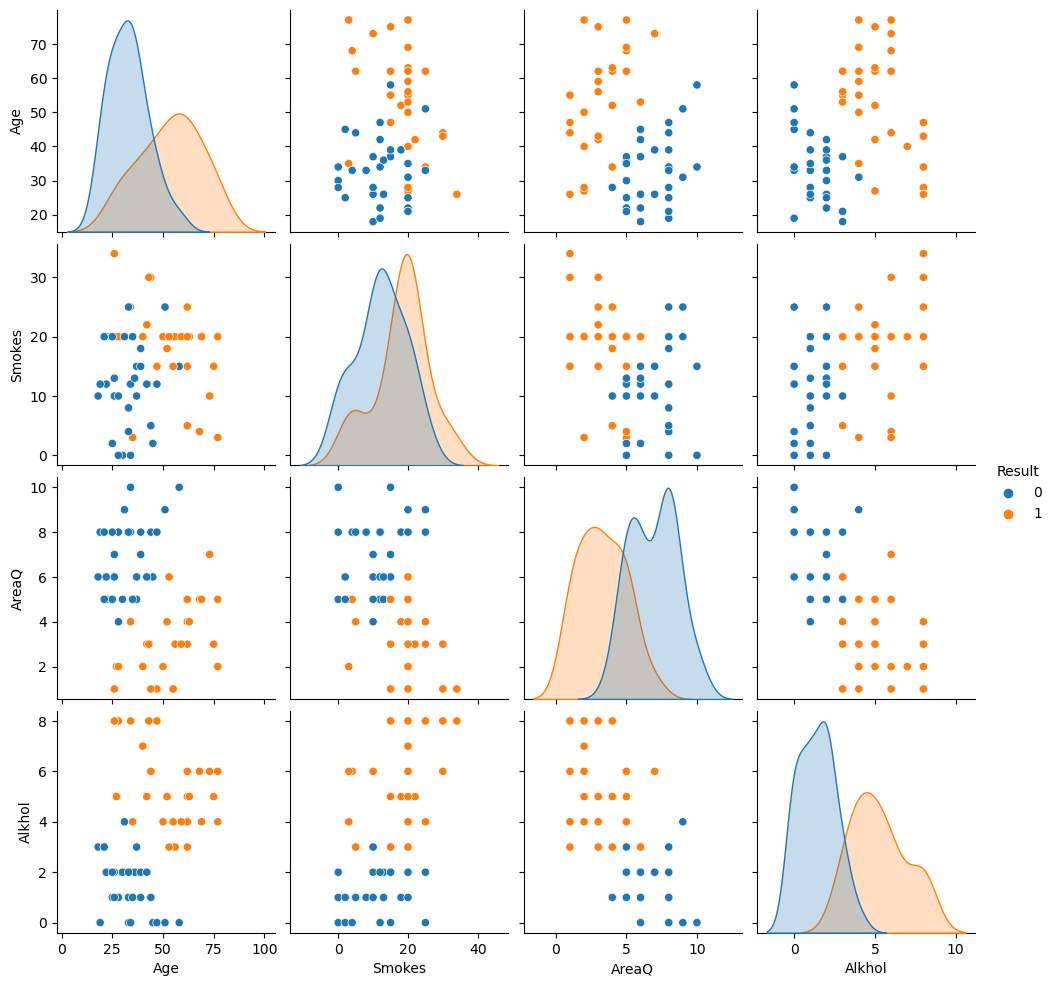

In [22]:
sns.pairplot(lung_df,hue = "Result")

<Axes: >

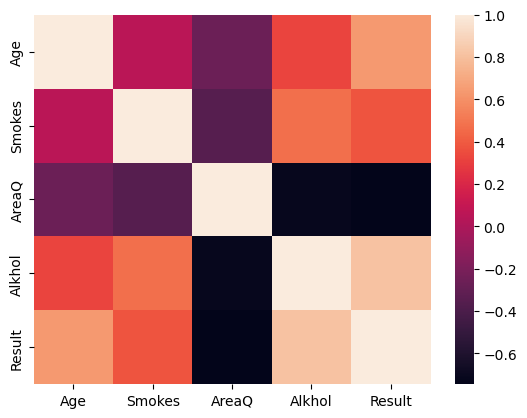

In [23]:
sns.heatmap(corr,)#to vizualize graphically(lighter shade=best co-relation

In [24]:
x=lung_df.drop(columns='Result',axis=1)
y=lung_df['Result']
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [25]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
x_train_prediction=model.predict(x_train)
x_train_accuracy=accuracy_score(x_train_prediction,y_train)

In [29]:
x_train_accuracy

1.0

In [30]:
x_test_prediction=model.predict(x_test)
x_test_accuracy=accuracy_score(x_test_prediction,y_test)

In [31]:
x_test_accuracy

0.8333333333333334

In [32]:
input_data = (21,4,300,0)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any lung cancer.'
else:
    message = 'You can have lung cancer, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)

[ 21   4 300   0]
[[ 21   4 300   0]]
[0]
Input Features:  (21, 4, 300, 0)
Prediction:  [0]
Prediction Message:  Nothing to worry, You do not have any lung cancer.


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
